
### 代码挑战
#### 任务目标
-  深入研究 回归的ANNs算法模型
-  理解 预测数据和 预测数据关系的区别


In [1]:
import numpy as np

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display

###  创建并训练模型的函数

In [2]:

def buildAndTrainTheModel(x, y):
    ANNReg = nn.Sequential(
        nn.Linear(1, 1),
        nn.ReLU(),
        nn.Linear(1, 1)
    )

    lossfun = nn.MSELoss()
    optimizer = torch.optim.SGD(ANNReg.parameters(), lr=.05)

    # 训练模型
    numepochs = 500
    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):

        yHat = ANNReg(x)

        loss = lossfun(yHat, y)
        losses[epochi] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNReg(x)
    return predictions, losses

#### 生成数据的函数

In [3]:

def createTheData(m):
    N = 50
    x = torch.randn(N, 1)
    y = m*x + torch.randn(N, 1) / 2
    return x, y

#### 测试一次

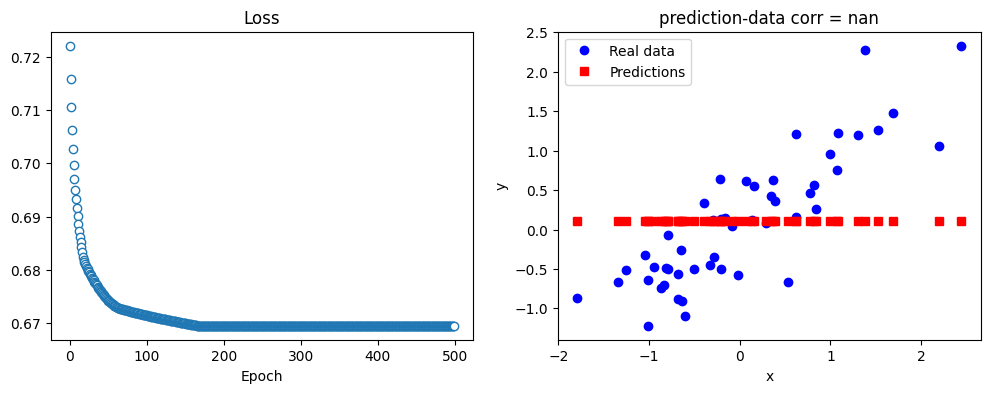

In [7]:
x, y = createTheData(.8)

yHat, losses = buildAndTrainTheModel(x, y)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))


ax[0].plot(losses.detach().numpy(), 'o', markerfacecolor='w', linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x, y, 'bo', label='Real data')
ax[1].plot(x, yHat.detach(), 'rs', label="Predictions")
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.detach().T)[0,1]:.2f}')
ax[1].legend()
plt.show()

### 现在开始实验


In [5]:

# the slopes to simulate

slopes = np.linspace(-2, 2, 21)

numExps = 50

# initialize output matrix
results = np.zeros((len(slopes), numExps, 2))


for slopei in range(len(slopes)):
    for N in range(numExps):
        x, y = createTheData(slopes[slopei])
        yHat, losses = buildAndTrainTheModel(x, y)

        results[slopei, N, 0] = losses[-1]
        results[slopei, N, 1] = np.corrcoef(y.T, yHat.detach().T)[0, 1]

results[np.isnan(results)] = 0

/Users/ouyuan/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/ouyuan/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


[[[0.24585903 0.9680634 ]
  [4.89748192 0.        ]
  [4.68267775 0.        ]
  ...
  [0.27829695 0.97133301]
  [0.23659351 0.96846763]
  [0.41485524 0.94261507]]

 [[0.24106817 0.95563401]
  [0.30028772 0.95295729]
  [0.39012623 0.93741581]
  ...
  [0.22540446 0.96751922]
  [0.22802614 0.97591159]
  [0.16847256 0.97433864]]

 [[0.17535228 0.9638006 ]
  [0.21861771 0.96130346]
  [2.77432108 0.        ]
  ...
  [3.5927341  0.        ]
  [0.2579926  0.95984731]
  [0.34398881 0.92967966]]

 ...

 [[0.19952884 0.97308413]
  [0.27118477 0.95699851]
  [0.19152568 0.94635993]
  ...
  [0.29939529 0.95459131]
  [3.2269938  0.        ]
  [3.03485894 0.        ]]

 [[4.06429148 0.        ]
  [0.22441906 0.97666235]
  [3.88402081 0.        ]
  ...
  [3.95626473 0.        ]
  [0.32629091 0.94906004]
  [0.24229068 0.97105607]]

 [[0.20236838 0.97783247]
  [0.32734248 0.95533184]
  [0.21189503 0.96588045]
  ...
  [0.27466846 0.97391041]
  [0.30502138 0.96441309]
  [0.19120789 0.96043946]]]


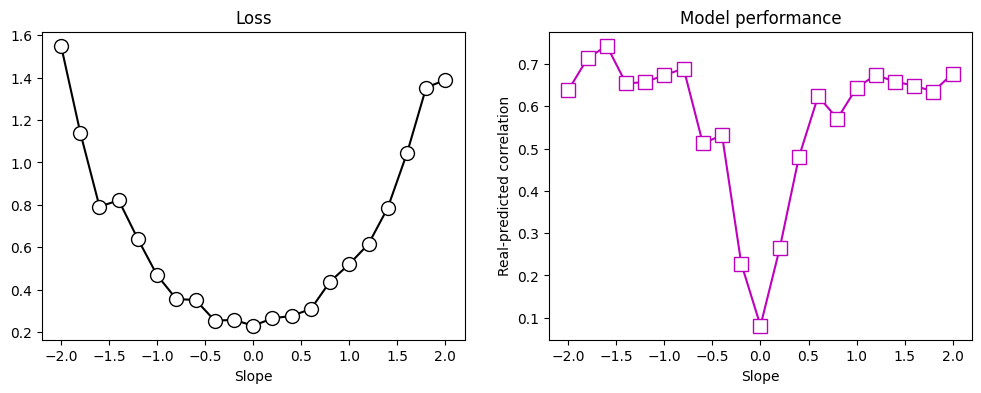

In [8]:

fix,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)

ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')


print(results)

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')
plt.show()

